https://colab.research.google.com/drive/1n1dDXzZjlF4mUtwoU5N4jeXkBxaueUE8#scrollTo=5zdA1FiBaY7E

In [ ]:
import numpy as np
import matplotlib.pyplot as plt
import scipy.special as ss
from scipy.stats import kstest, uniform
import pandas as pd
from numpy.linalg import cholesky

In [ ]:
def alpha_stable_gen(alpha, beta, gamma, delta, n):
  """
  Function to generate independent alpha stable random variables

  params
  ------
  alpha - stability parameter (float)
  beta - skewness parameter (float)
  gamma - scale parameter (float)
  delta- location parameter (float)
  n - number of simulated independent random variables (int)

  returns
  -------
  array of length n of independent alpha stable random variables (np.array)
  """

  Theta = np.random.uniform(-np.pi/2, np.pi/2, n)
  W = np.random.exponential(1, n)
  theta_0 = np.arctan(beta * np.tan(np.pi * alpha/2))/alpha
  if alpha != 1:
      Z = np.sin(alpha * (theta_0 + Theta))/(np.cos(alpha * theta_0) * np.cos(Theta))**(1/alpha) * (np.cos(alpha * theta_0 + (alpha - 1) * Theta) / W)**((1-alpha) / alpha)
      X = gamma * Z + delta
  else:
      Z = 2/np.pi * ((np.pi/2 + beta * Theta) * np.tan(Theta) - beta * np.log((np.pi/2 * W * np.cos(Theta)) / (np.pi/2 + beta * Theta)))
      X = gamma * Z + delta + beta * 2/np.pi * gamma * np.log(gamma)
  return X

## Exercise 1

We generate multivariable stable distributions with discrete spectral measures using the formula.

$\mathbf{X} \stackrel{D}{=} 
\begin{cases}
   \sum_{j=1}^n \gamma_j^{1/\alpha} Z_j \mathbf{s}_j, & \alpha \neq 1,
   \\
   \sum_{j=1}^n \gamma_j (Z_j + \frac{2}{\pi} \log{\gamma_j})\mathbf{s}_j, & \alpha = 1,
\end{cases}
$

where $Z_1, Z_2, \dots, Z_n$ are iid totally skewed, standardized one dimensional $\alpha$-stable random variables, i.e. $Z_i \sim S_\alpha (\beta = 1, \gamma = 1, \delta = 0)$.

In [ ]:
def alpha_stable_vector(alpha, N, Gamma, S, d):
    """
    Function to generate multivariate stable distributions with discrete spectral measures

    params
    ------
    alpha - stability parameter (float)
    N - number of simulated independent random variables (int)
    Gamma - masses at the points (np.array)
    S - mass points coordinates (np.array)
    d - number of dimensions (int)

    returns
    -------
    matrix of size 2xN of multivariate stable distributions with discrete spectral measures (np.array)
    """
    n = len(Gamma)
    Gamma = np.array(Gamma)
    X = []
    Z = [alpha_stable_gen(alpha, 1, 1, 0, N) for _ in Gamma]  
    for i in range(d):
        if alpha != 1:
            X.append(np.dot(Gamma**(1/alpha) * np.transpose(Z), np.transpose(S)[i]))
        else:
            X.append(np.dot(Gamma * (np.transpose(Z) + 2/np.pi * np.log(Gamma)), np.transpose(S)[i]))
    return np.array(X)

We chose the next masses and mass points coordinates.

### a. Symmetric stable vector 

  *   $γ_1 = 0.5$ at $s_1 = (1, 0)$,
  *   $γ_2 = 0.75$ at $s_2 = (\sqrt{2}/2, \sqrt{2}/2)$,
  *   $γ_3 = 0.5$ at $s_3 = (0, 1)$,
  *   $γ_4 = 0.25$ at $s_4 = (-\sqrt{2}/2, \sqrt{2}/2)$,
  *   $γ_5 = 0.5$ at $s_5 = (-1, 0)$,
  *   $γ_6 = 0.75$ at $s_6 = (-\sqrt{2}/2, -\sqrt{2}/2)$,
  *   $γ_7 = 0.5$ at $s_7 = (0, -1)$,
  *   $γ_8 = 0.25$ at $s_8 = (\sqrt{2}/2, -\sqrt{2}/2)$.

In [ ]:
Gamma1 = [0.5, 0.75, 0.5, 0.25, 0.5, 0.75, 0.5, 0.25]
a = np.sqrt(2) / 2
S1 = np.array([[1, 0],
              [a, a],
              [0, 1],
              [-a, a],
              [-1, 0],
              [-a, -a],
              [0, -1],
              [a, -a]])
alpha = 1.6
N = 10000
d = 2
Z1 = alpha_stable_vector(alpha, N, Gamma1, S1, d)

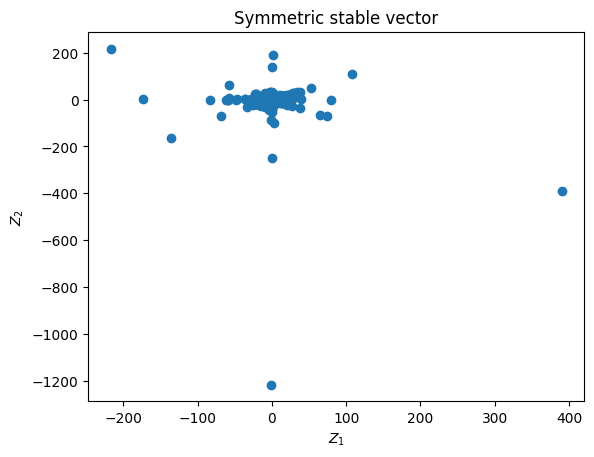

In [ ]:
plt.scatter(Z1[0], Z1[1])
plt.title("Symmetric stable vector")
plt.xlabel(r'$Z_1$')
plt.ylabel(r'$Z_2$')
plt.show()

### b. Stable vector with independent components 

  *   $γ_1 = 0.25$ at $s_1 = (1, 0)$,
  *   $γ_2 = 0.5$ at $s_2 = (0, 1)$,
  *   $γ_3 = 0.25$ at $s_3 = (-1, 0)$,
  *   $γ_4 = 0.5$ at $s_4 = (0, -1)$.

In [ ]:
Gamma2 = [0.25, 0.5, 0.25, 0.5]
S2 = np.array([[1, 0],
              [0, 1],
              [-1, 0],
              [0, -1]])
alpha = 1.6
N = 10000
d = 2
Z2 = alpha_stable_vector(alpha, N, Gamma2, S2, d)

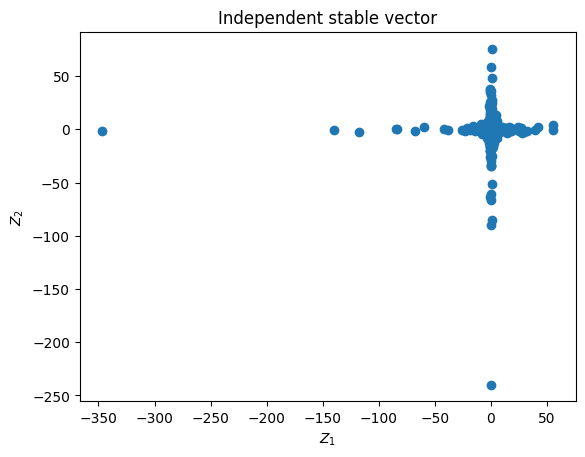

In [ ]:
plt.scatter(Z2[0], Z2[1])
plt.title("Independent stable vector")
plt.xlabel(r'$Z_1$')
plt.ylabel(r'$Z_2$')
plt.show()

### c. Stable vector which is not symmetric and does not have independent components


  *   $γ_1 = 0.7$ at $s_1 = (\sqrt{3}/2, 1/2)$,
  *   $γ_2 = 0.2$ at $s_2 = (0, 1)$,
  *   $γ_3 = 0.2$ at $s_3 = (-1/2, \sqrt{3}/2)$,
  *   $γ_4 = 0.5$ at $s_4 = (-\sqrt{2}/2, -\sqrt{2}/2)$,
  *   $γ_5 = 0.7$ at $s_5 = (\sqrt{3}/2, -1/2)$.

In [ ]:
Gamma3 = [0.7, 0.2, 0.2, 0.5, 0.7]
S3 = np.array([[np.sqrt(3)/2, 0.5],
              [0, 1],
              [-0.5, np.sqrt(3)/2],
              [-np.sqrt(2)/2, -np.sqrt(2)/2],
              [np.sqrt(3)/2, -0.5]])
alpha = 1.6
N = 10000
d = 2
Z3 = alpha_stable_vector(alpha, N, Gamma3, S3, d)

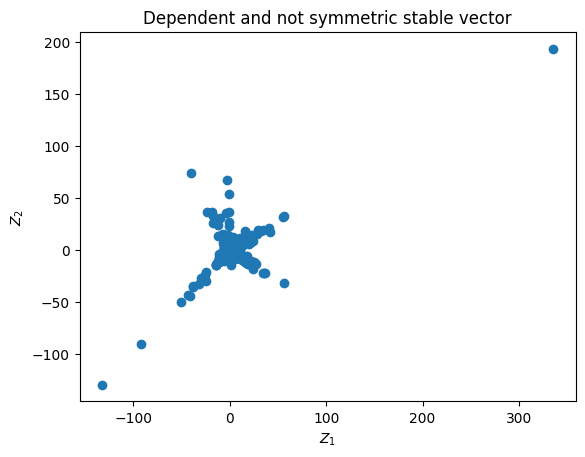

In [ ]:
plt.scatter(Z3[0], Z3[1])
plt.title("Dependent and not symmetric stable vector")
plt.xlabel(r'$Z_1$')
plt.ylabel(r'$Z_2$')
plt.show()

## Exercise 2

We generate sub-Gaussian vectors with uniform spectral measure. Choose a random variable $A \sim S_{\alpha / 2} (\beta = 1, \gamma = \left( \cos{\frac{\pi \alpha}{4}}\right)^{2 / \alpha}, \delta = 0)$ with $\alpha < 2$. Let $\mathbf{G} = [G_1, G_2, \dots, G_d]$  be a zero
mean Gaussian vector in $\mathbb {R}^d$ independent of $A$.  Then the random vector

$$\mathbf{X} = A^{1/2}[G_1, G_2, \dots, G_d]$$

has symmetric $α$-stable distribution in $\mathbb {R}^d$ and is called a sub-Gaussian $SαS$ random vector
in $\mathbb {R}^d$ with underlying Gaussian vector $\mathbf{G}$.

In [ ]:
def sub_gaussian(alpha, sigma, d, n):
    """
    Function to generate sub-Gaussian vectors with uniform spectral measure

    params
    ------
    alpha - stability parameter (float)
    sigma - variance (float)
    d - number of dimensions (int)
    n - number of simulated independent random variables (int)

    returns
    -------
    matrix of size 2xN of sub-Gaussian vectors with uniform spectral measure (np.array)
    """
    beta = 1
    gamma = (np.cos(np.pi * alpha / 4))**(2/alpha)
    delta = 0
    
    A = alpha_stable_gen(alpha/2, beta, gamma, delta, n)
    G = [np.random.normal(0, sigma, n) for _ in range(d)]
    X = A ** (1/2) * G
    
    return X

In [ ]:
alpha = 0.5
sigma = 2
d = 2
n = 10000
Z = sub_gaussian(alpha, sigma, d, n)

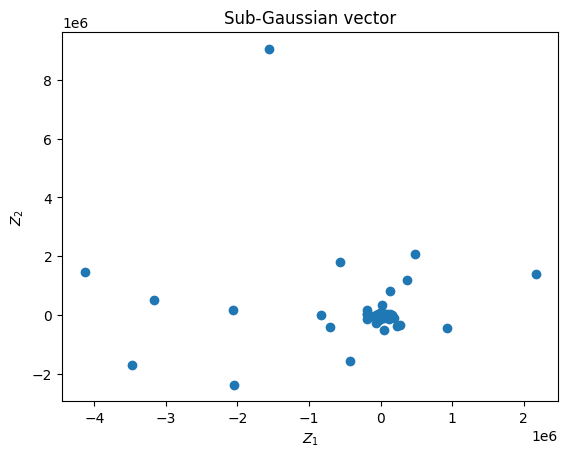

In [ ]:
plt.scatter(Z[0], Z[1])
plt.title("Sub-Gaussian vector")
plt.xlabel(r'$Z_1$')
plt.ylabel(r'$Z_2$')
plt.show()

## Exercise 3

We will use `alpha_estimation_cf(Z, K)` method to estimate parameter $\alpha$ based on the CF.

We calculate CF by the formula:

$$
\varphi(t) = \mathbb{E}[e^{itZ}]
$$

We use $t = \pi k / 25, \;\;\; k = 1, \ldots K$.

$|\varphi(t)|^2 = e^{-2c |t|^{\alpha}}$

So $\log({-\log{|\varphi(t)|^2}}) = \alpha \log{|t|} + log{(2c)}$.

$x = \log{t}, \;\;\; y = \log({-\log{|\varphi(t)|^2}}), \;\;\; a = \alpha, \;\;\; b = log{(2c)}$

Calculate the coefficients of the linear regression $y = ax + b$ by the formulas:

$a = \frac{\sum_{i=1}^n (x_i - \bar{x})(y_i - \bar{y})}{\sum_{i=1}^n (x_i - \bar{x})^2}$

$b = \bar{y} - a \bar{x}$

We will use this method for both coordinates and then take the mean value.

In [ ]:
def alpha_estimation_cf(Z, K):
  """
  Function to estimate alpha parameter of the stable random variables
  based on empirical characteristic function

  params
  ------
  Z - sample of indedependet alpha stable random variables (np.array)
  K - 

  returns
  -------
  a, b (float, float) - linear regression coefficients, where a = alpha 
  """  

  n = len(Z)

  t = [np.pi * k / 25 for k in np.linspace(1, K+1, K)]
  cf = [np.mean(np.exp(1j * t_value * Z)) for t_value in t]

  x = np.log(t)
  y = np.log(-np.log(np.abs(cf)**2))

  mu_x = np.mean(x)
  mu_y = np.mean(y)

  a = np.sum((x - mu_x) * (y-mu_y)) / np.sum((x - mu_x)**2)
  b = mu_y - a * mu_x

  return a, b

We will use Rachev-Xin-Chen method to estimate spectral measure. First for a set $A \subset S_d$ we will define the cone as:
$$Cone(A) = \{ X \in \mathbb{R}^d: |X|>0,X/|X| \in A\}. $$
We will estimate normalized $\Gamma$ in the cone $A$ as the fraction of obervations in direction $A$ with norm $> r$:
$$\hat{\Gamma}(A) = \frac{\#\{X_i: X_i\in Cone(A),\,|X_i| > r\}}{\#\{X_i: X_i > r\}}.$$

In [ ]:
def spectral_measure_estimation(X, Y, r, n, continuous = False):
    """
    Function to estimate spectral measure Gammma for a given sample

    params
    ------
    X - sample of first coordinates of teh vector (np.array)
    Y - sample of second coordinates of teh vector (np.array)
    r - radius (float)
    n - number of intervals into which we divide unit sphere
    continuous: false - we divide the unit shere and normalize the spectral measure
              : true - we don't divide the unit sphere and don't normalize (return only angles)

    returns
    -------
    normalized Gamma in each direction (np.array)
    """

    norm = np.sqrt(X**2 + Y**2)
    norm_filter = norm > r
    Y_f = Y[norm_filter]
    X_f = X[norm_filter]
    
    intervals = np.linspace(0,2 * np.pi, n + 1)
    angles = np.mod(np.arctan2(Y_f, X_f), 2 * np.pi)

    if continuous:
        return angles
    else:
        cone = []
        for i in range(n+1):
            if i == n:
                cone.append(np.sum(angles >= intervals[i]))
            else:
                cone.append(np.sum(np.logical_and(angles >= intervals[i],angles < intervals[i+1])))
        cone = np.array(cone)

        return cone/np.sum(norm_filter)

In [ ]:
intervals = np.linspace(0,2 * np.pi, 16)

### a. Symmetric stable vector 

In [ ]:
Gamma_est = spectral_measure_estimation(Z1[0], Z1[1], 25, 15)

In [ ]:
norm_Gamma = Gamma1 / np.sum(Gamma1)
S_angles = np.mod(np.arctan2(S1[:,1], S1[:,0]), 2 * np.pi)

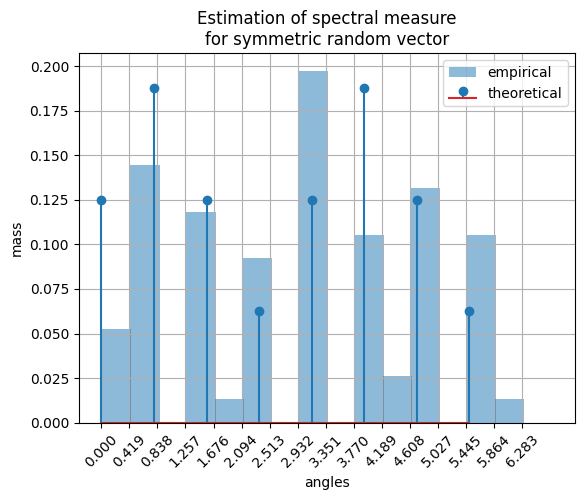

In [ ]:
width = 0.45
plt.bar(intervals + width/2, Gamma_est, width, alpha = 0.5)
plt.stem(S_angles, norm_Gamma)
plt.xticks(intervals, rotation = 45)
plt.xlabel("angles")
plt.ylabel("mass")
plt.legend(["empirical","theoretical"])
plt.title("Estimation of spectral measure\nfor symmetric random vector")
plt.grid()
plt.show()

In [ ]:
print(f"Estimated alpha = {np.mean([alpha_estimation_cf(Z1[0], 10)[0], alpha_estimation_cf(Z1[1], 10)[0]])}.")

Estimated alpha = 1.5926200262811236.


### b. Stable vector with independent components 

In [ ]:
Gamma_est = spectral_measure_estimation(Z2[0], Z2[1], 25, 15)

In [ ]:
norm_Gamma = Gamma2 / np.sum(Gamma2)
S_angles = np.mod(np.arctan2(S2[:,1], S2[:,0]), 2 *np.pi)

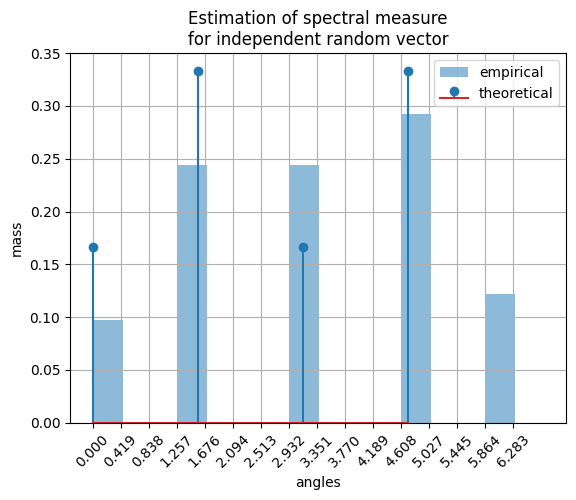

In [ ]:
width = 0.45
plt.bar(intervals + width/2, Gamma_est, width, alpha = 0.5)
plt.stem(S_angles, norm_Gamma)
plt.xticks(intervals, rotation = 45)
plt.xlabel("angles")
plt.ylabel("mass")
plt.legend(["empirical","theoretical"])
plt.title("Estimation of spectral measure\nfor independent random vector")
plt.grid()
plt.show()

In [ ]:
print(f"Estimated alpha = {np.mean([alpha_estimation_cf(Z2[0], 10)[0], alpha_estimation_cf(Z2[1], 10)[0]])}.")

Estimated alpha = 1.5800262570543504.


### c. Stable vector which is not symmetric and does not have independent components


In [ ]:
Gamma_est = spectral_measure_estimation(Z3[0], Z3[1], 25, 15)

In [ ]:
norm_Gamma = Gamma3 / np.sum(Gamma3)
S_angles = np.mod(np.arctan2(S3[:,1], S3[:,0]), 2 * np.pi)

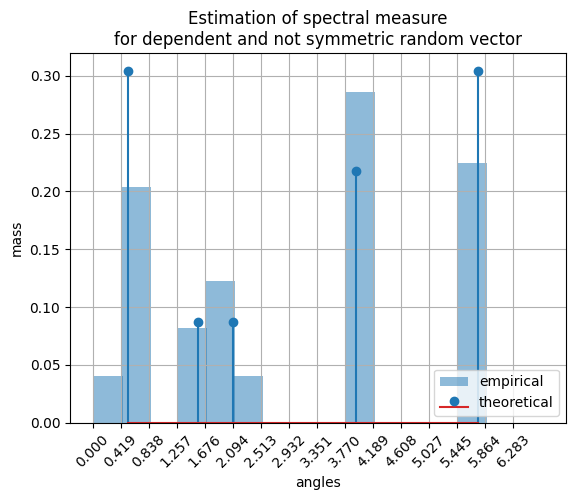

In [ ]:
width = 0.45
plt.bar(intervals + width/2, Gamma_est, width, alpha = 0.5)
plt.stem(S_angles, norm_Gamma)
plt.xticks(intervals, rotation = 45)
plt.xlabel("angles")
plt.ylabel("mass")
plt.legend(["empirical","theoretical"])
plt.title("Estimation of spectral measure\nfor dependent and not symmetric random vector")
plt.grid()
plt.show()

In [ ]:
print(f"Estimated alpha = {np.mean([alpha_estimation_cf(Z3[0], 10)[0], alpha_estimation_cf(Z3[1], 10)[0]])}.")

Estimated alpha = 1.5854724825339865.


### d. Sub-Gaussian vector

In [ ]:
Gamma_est = spectral_measure_estimation(Z[0], Z[1], 25, 15)

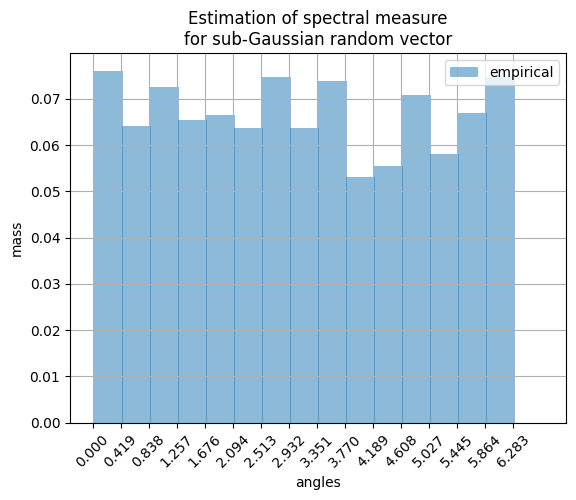

In [ ]:
width = 0.45
plt.bar(intervals + width/2, Gamma_est, width, alpha = 0.5)
plt.xticks(intervals, rotation = 45)
plt.xlabel("angles")
plt.ylabel("mass")
plt.legend(["empirical"])
plt.title("Estimation of spectral measure\nfor sub-Gaussian random vector")
plt.grid()
plt.show()

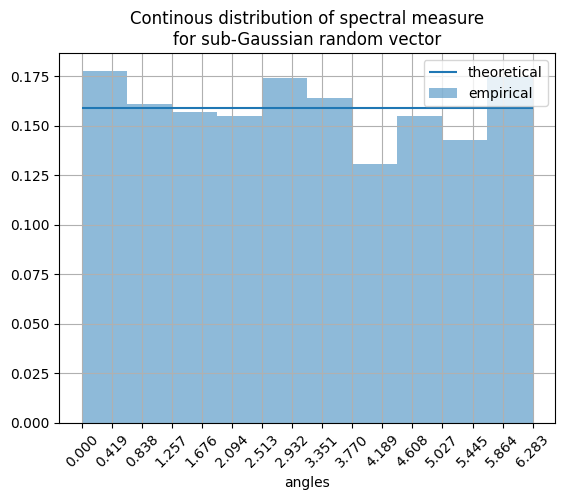

In [ ]:
angles = spectral_measure_estimation(Z[0], Z[1], 25, 15, continuous = True)
plt.hist(angles, density = True, alpha = 0.5)
plt.hlines(xmin = 0,xmax = 2 * np.pi, y = 1 / (2*np.pi))
plt.xticks(intervals, rotation = 45)
plt.xlabel("angles")
plt.legend(["theoretical","empirical"])
plt.title("Continous distribution of spectral measure\nfor sub-Gaussian random vector")
plt.grid()
plt.show()

In [ ]:
U = uniform.rvs(0,2 * np.pi, size = 1000)
kstest(angles, U)

KstestResult(statistic=0.025894459102902376, pvalue=0.7275228975532055, statistic_location=4.699119532522063, statistic_sign=-1)

In [ ]:
print(f"Estimated alpha = {np.mean([alpha_estimation_cf(Z[0], 10)[0], alpha_estimation_cf(Z[1], 10)[0]])}.")

Estimated alpha = 0.5040869681040626.


### Conclusion

Our multivariate stable distribution generator is correct. Higher estimated masses for given direction coresponds to higher theoretical gamma for the given points of the unit sphere. Moreover the alpha parameter estimated using the characteristic function method is very close to the theoretical value.

The spectral measure for sub-Gaussian random vector is uniform which is confirmed by the histogram and kstest. P-value is greather then the assumed significance level $0.05$, so we don't have reasons to reject the null hypothesis.

We can distinguish between discrete and continous spectral measure by looking at the bar plot. For the disrete case there are directions with zero observations.

## Exercise 4

We estimate the characteristic function of the multivariate stable distributions with discrete spectral measures $\mathbf{X} \sim S_{\alpha, d}(\Gamma, \mu^0 = 0)$

$$
\phi^* (\mathbf{t}) = \exp{\left( - \sum_{j=1}^n \psi_{\alpha} (\langle \mathbf{t}, \mathbf{s}_j \rangle) \gamma_j\right)},
$$

where $\psi_{\alpha}$ is given by

$$\psi_{\alpha} (u) =  
\begin{cases}
   |u|^\alpha (1 - i \text{sign}(u) \tan{\frac{\pi \alpha}{2}}), & \alpha \neq 1,
   \\
   |u| (1 + i \frac{2}{\pi}\text{sign}(u)) \log{|u|}, & \alpha = 1,
\end{cases}$$

where $u = \langle \mathbf{t}, \mathbf{s}_j \rangle$

In [ ]:
def estimator_char_function(alpha, Gamma, S, t):
  """
  Function to estimate the characteristic function for a given sample with discrete spectral measures

  params
  ------
  alpha - stability parameter (float)
  Gamma - masses at the points (np.array)
  S - mass points coordinates (np.array)
  t - points in which we estimate the characteristic function  (np.array)

  returns
  -------
  characteristic function (np.array)
  """  
  u_value = np.dot(t, np.transpose(S))

  if alpha == 1:
    psi = [np.abs(u) * (1 + 1j * 2 / np.pi * np.sign(u) * np.log(u)) for u in u_value]
  else:
    psi = [np.abs(u)**alpha * (1 - 1j * np.sign(u) * np.tan(np.pi * alpha / 2)) for u in u_value]
  phi = np.exp(-np.dot(psi, np.transpose(Gamma)))
  return phi

We estimate the characteristic function in 10000 points. 

In [ ]:
n = 10000
thetas = np.random.uniform(0, 2 * np.pi, n)
t = [[np.cos(theta), np.sin(theta)] for theta in thetas]
alpha = 1.6

### a. Symmetric stable vector 

In [ ]:
char_fun_est = estimator_char_function(alpha, Gamma1, S1, t)
print(char_fun_est[0:10])

[0.07071329-8.89342988e-19j 0.10468372-1.45277843e-18j
 0.16024426+2.22383581e-18j 0.17508071+4.85946582e-18j
 0.1524692 -4.23187040e-18j 0.18082205-0.00000000e+00j
 0.14636819-1.01563337e-18j 0.11350684-0.00000000e+00j
 0.17425346-0.00000000e+00j 0.0818358 -1.70354984e-18j]


In [ ]:
empir_char_fun = np.array([np.mean(np.exp(1j * np.dot(np.transpose(Z1), t_value))) for t_value in t])
print(empir_char_fun[0:10])

[0.08101664+0.00386752j 0.10765881-0.00219099j 0.15696748-0.00568176j
 0.17446656-0.00576709j 0.15233934-0.0081075j  0.1766601 -0.00482111j
 0.1459116 -0.00388724j 0.11517829+0.00433023j 0.17200159-0.00800042j
 0.08902404-0.00154302j]


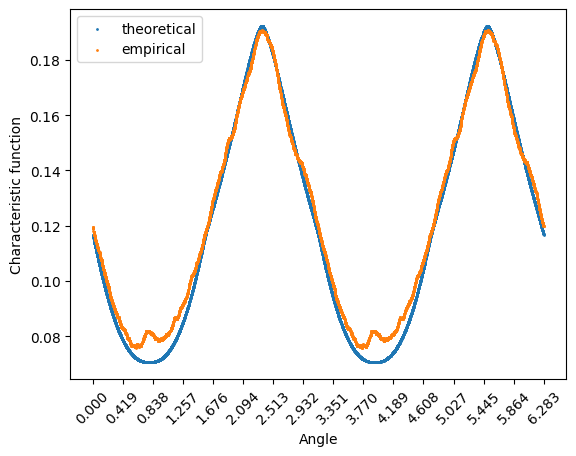

In [ ]:
plt.scatter(thetas, char_fun_est, label = "theoretical", s = 1)
plt.scatter(thetas, empir_char_fun, label = "empirical", s = 1)
plt.xlabel("Angle")
plt.ylabel("Characteristic function")
plt.xticks(intervals, rotation = 45)
plt.legend()
plt.show()

### b. Stable vector with independent components 

In [ ]:
char_fun_est = estimator_char_function(alpha, Gamma2, S2, t)
print(char_fun_est[0:10])

[0.41645994-0.j 0.36616681-0.j 0.50798947-0.j 0.47202485-0.j
 0.37035692-0.j 0.39527405-0.j 0.54352275-0.j 0.36752298-0.j
 0.38714022-0.j 0.37037818-0.j]


In [ ]:
empir_char_fun = np.array([np.mean(np.exp(1j * np.dot(np.transpose(Z2), t_value))) for t_value in t])
print(empir_char_fun[0:10])

[0.40922055-0.00518939j 0.36383422-0.00968874j 0.50862815-0.01017564j
 0.47133654-0.01087404j 0.36831479-0.01430202j 0.39691944-0.01303117j
 0.54583416-0.00754781j 0.3652848 +0.01138518j 0.38791668-0.01257158j
 0.36751427+0.00769183j]


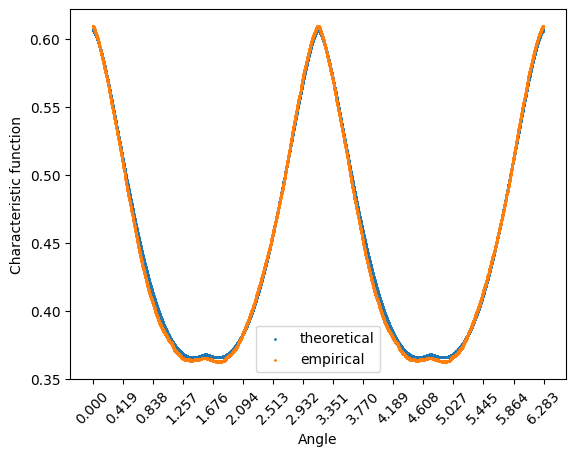

In [ ]:
plt.scatter(thetas, char_fun_est, label = "theoretical", s = 1)
plt.scatter(thetas, empir_char_fun, label = "empirical", s = 1)
plt.xlabel("Angle")
plt.ylabel("Characteristic function")
plt.xticks(intervals, rotation = 45)
plt.legend()
plt.show()

### c. Stable vector which is not symmetric and does not have independent components


In [ ]:
char_fun_est = estimator_char_function(alpha, Gamma3, S3, t)
print(char_fun_est[0:10])

[0.24609764-0.06719973j 0.31840356-0.0322263j  0.2450404 +0.1365068j
 0.2753183 +0.13317037j 0.36556738+0.04602117j 0.36263139+0.08189147j
 0.22285766+0.13511045j 0.32678219+0.0213651j  0.36946878+0.07334713j
 0.29245195+0.0585787j ]


In [ ]:
empir_char_fun = np.array([np.mean(np.exp(1j * np.dot(np.transpose(Z3), t_value))) for t_value in t])
print(empir_char_fun[0:10])

[0.24877074-0.064606j   0.33849152-0.04170946j 0.25004328+0.13330197j
 0.276007  +0.12995785j 0.3794566 +0.04188027j 0.36940082+0.08116152j
 0.22847178+0.13020416j 0.34749322+0.03174948j 0.37633818+0.07338271j
 0.30673894+0.06315301j]


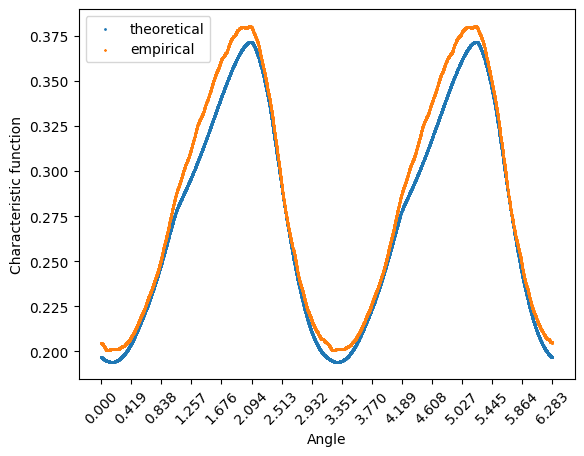

In [ ]:
plt.scatter(thetas, char_fun_est, label = "theoretical", s = 1)
plt.scatter(thetas, empir_char_fun, label = "empirical", s = 1)
plt.xlabel("Angle")
plt.ylabel("Characteristic function")
plt.xticks(intervals, rotation = 45)
plt.legend()
plt.show()

### d. Sub-Gaussian vector

We estimate the characteristic function of the sub-Gaussian random vector

$$
\mathbb {E} \exp{\left\{ i \sum_{k=1}^d \theta_k X_k \right\}} = \exp{\left\{ -2^{-\alpha/2} \sigma^\alpha |\theta|^\alpha\right\}}
$$

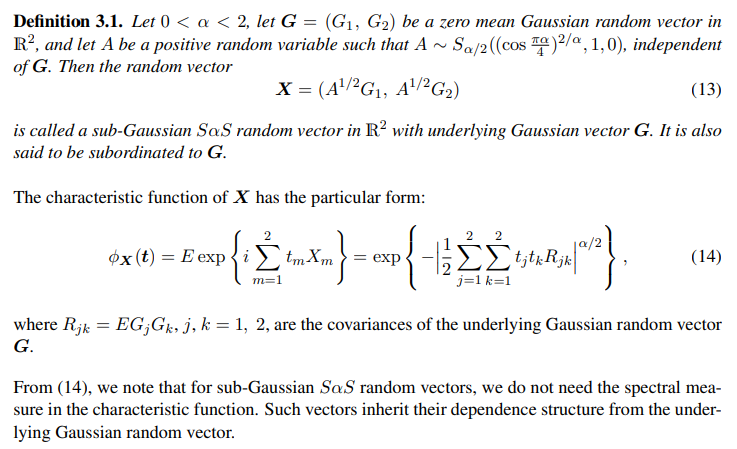

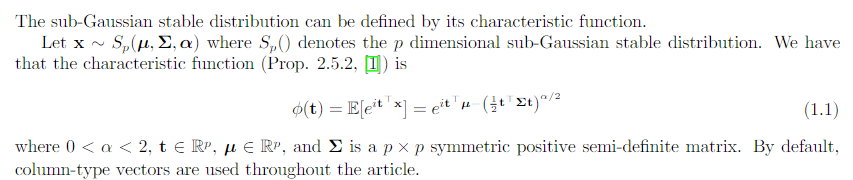

In [ ]:
def estimator_char_function_sub_gaus(alpha, sigma, t):
  """
  Function to estimate the characteristic function for a given sample with discrete spectral measures

  params
  ------
  alpha - stability parameter (float)
  sigma - variance (float)
  thetas - points (angle) in which we estimate the characteristic function (np.array)

  returns
  -------
  characteristic function (np.array)
  """  
  phi = []
  for t_value in t:
    # phi.append(np.exp(- np.abs(1/2 * sigma * (np.dot(t_value, t_value) + np.dot(t_value, np.transpose(t_value))))**(alpha / 2)))
    phi.append(np.exp(- np.abs(1/2 * sigma * (t_value[0]*t_value[0] + t_value[0]*t_value[1] + t_value[1]*t_value[0] + t_value[1]*t_value[1])))**(alpha / 2))
  return np.exp(- np.abs(1/2 * sigma * np.abs(thetas)**alpha)**(alpha / 2))

In [ ]:
# def estimator_char_function_sub_gaus(alpha, sigma, thetas):
#   """
#   Function to estimate the characteristic function for a given sample with discrete spectral measures

#   params
#   ------
#   alpha - stability parameter (float)
#   sigma - variance (float)
#   thetas - points (angle) in which we estimate the characteristic function (np.array)

#   returns
#   -------
#   characteristic function (np.array)
#   """  
#   return np.exp(- 2**(-alpha / 2) * sigma**alpha * np.abs(thetas)**alpha)

We estimate the characteristic function in 10000 points. 

In [ ]:
n = 10000
# thetas = np.random.uniform(0, 2 * np.pi, n)
t = np.random.uniform(0, 50, size = (n, 2))
alpha = 0.5

In [ ]:
t

array([[49.07803774, 22.82880232],
       [13.71379283,  3.26281462],
       [ 9.0271339 , 39.78579454],
       ...,
       [ 2.08554325, 31.99050459],
       [44.49220453, 43.37216777],
       [32.92519351, 12.48997108]])

In [ ]:
alpha = 0.5
sigma = 2
d = 2
n = 10000
Z = sub_gaussian(alpha, sigma, d, n)

In [ ]:
char_fun_est = estimator_char_function_sub_gaus(alpha, sigma, t)
print(char_fun_est[0:10])

[0.41607157 0.30448105 0.31299294 0.32753777 0.29686823 0.28602201
 0.36716587 0.36692784 0.35446166 0.2947557 ]


In [ ]:
empir_char_fun = []
for t_value in t:
  empir_char_fun.append(np.mean(np.exp(1j * (t_value[0] * Z[0] + t_value[1] * Z[1]))))

In [ ]:
# empir_char_fun = np.array([np.mean(np.exp(1j * np.dot(np.transpose(Z), t_value))) for t_value in t])
# print(empir_char_fun[0:10])

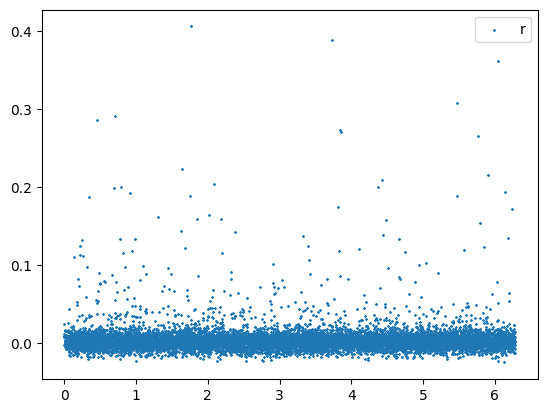

In [ ]:
plt.scatter(thetas, np.real(empir_char_fun), marker = '*', label = "r", s = 1)
# plt.scatter(thetas, np.imag(empir_char_fun), marker = '*', label = "im")
plt.legend()

/usr/local/lib/python3.10/dist-packages/matplotlib/collections.py:192: ComplexWarning: Casting complex values to real discards the imaginary part
  offsets = np.asanyarray(offsets, float)


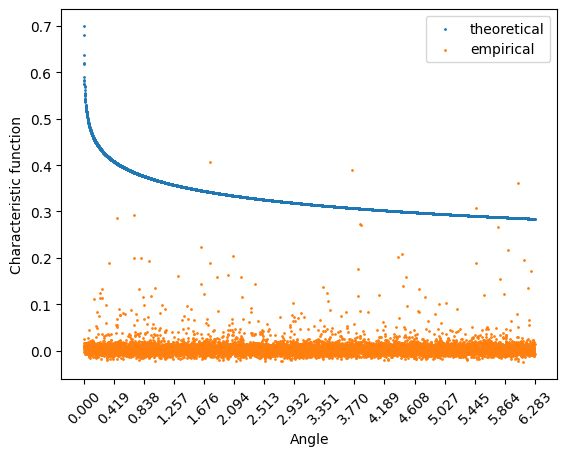

In [ ]:
plt.scatter(thetas, char_fun_est, label = "theoretical", s = 1)
plt.scatter(thetas, empir_char_fun, label = "empirical", s = 1)
plt.xlabel("Angle")
plt.ylabel("Characteristic function")
plt.xticks(intervals, rotation = 45)
plt.legend()
plt.show()

### Conclusion

The estimator of the characteristic function of the multivariate stable distributions with discrete spectral measures works well. We can compare the values on the scatter plots. They are very close. 

## Exercise 5


We will define the codifference between random variables $X$ and $Y$ as:
$$ \tau_{X,Y} = \log\left(\mathbb{E}\left[e^{i(X-Y)}\right]\right) - \log\left(\mathbb{E}\left[e^{iX}\right]\right) - \log\left(\mathbb{E}\left[e^{-iY}\right]\right).$$

In [ ]:
def codif(X, Y):
    """
    Function to calculate the codifference between two random variables

    params
    ------
    X - first random variable sample(np.array)
    Y - second random variable sample (np.array)
    """
    cf_xy = np.mean(np.exp(1j * (X - Y)))
    cf_x = np.mean(np.exp(1j * X ))
    cf_y = np.mean(np.exp(1j * (-Y)))
    tau = np.log(np.real(cf_xy)) - np.log(np.real(cf_x)) - np.log(np.real(cf_y))
    return tau

In [ ]:
tau = np.zeros((3, 3))
Gamma_list = [Gamma1, Gamma2, Gamma3]
S_list = [S1, S2, S3]

for i in range(3):
    for j, alpha in enumerate([0.5, 1, 1.5]):
        Z = alpha_stable_vector(alpha, 10000, Gamma_list[i], S_list[i], 2)
        tau[j, i] = codif(Z[0],Z[1])

In [ ]:
tau_df = pd.DataFrame(tau, columns = ["symmetric", "independent", "dependent-asymmetric"], index = [0.5, 1, 1.5])
tau_df

,symmetric,independent,dependent-asymmetric
0.5,2.639722,-0.049471,1.769992
1.0,2.115178,-0.018795,1.439587
1.5,1.827277,-0.000066,0.769929


Now we will generate two dimensional normal random vector with mean and covariance matrix:
$$ \mathbf{\mu} = \begin{bmatrix}0\\0\end{bmatrix},\, \mathbf{\Sigma} = \begin{bmatrix}1&0.25\\0.25&0\end{bmatrix}.$$

We will compare codifference and covariance between two coordinates of the normal random vector.

In [ ]:
Sigma = np.array([[1,0.25], [0.25,1]])
L = cholesky(Sigma)
Norm = np.random.normal(0, 1, (2,1000))
Z = np.dot(L, Norm)

In [ ]:
print(f"Codifference:{round(codif(Z[0,:], Z[1,:]), 3)}, covariance:{round(np.cov(Z[0,:], Z[1,:])[0,1], 3)}")

Codifference:0.219, covariance:0.231


## Conclusion

It can be seen that for dependent random variables the greater alpha the smaller coddiference. For independent case codifference is close to $0$.

Morover it can be seen that for normal random vector codifference is the same as covariance.